<a href="https://colab.research.google.com/github/OrenNizry/heart-disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Model
# Oren Nizry 208708784

## Introduction
This notebook demonstrates the process of building a prediction model for heart disease using a dataset. The steps include data visualization, checking for null values, creating a heatmap for correlation, feature engineering, data splitting, model selection, hyperparameter tuning, and evaluating the best model using a confusion matrix.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Load the dataset
data = pd.read_csv('heart.csv')


# Display dataset (In-depth analysis of the problem and the data )

In [5]:
# Display first few rows
print(data.head())

# Basic dataset information
data.info()
data.describe()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check & Cleaning data - Unique Values and Duplicates

Check for unique values in each column and remove any duplicated rows.
we notice that a series part of the data is duplicate coloumns



In [6]:
# Check unique values and count after adding the new feature
for col in data.columns:
    unique_values_count = data[col].unique().shape[0]
    total_values_count = data[col].shape[0]
    print(f"{col} has {unique_values_count} unique values out of {total_values_count}")

# Check for duplicated rows
num_duplicated_rows = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")

# Remove duplicates
data = data.drop_duplicates()
print(f"Shape of the dataset after removing duplicates: {data.shape}")


age has 41 unique values out of 1025
sex has 2 unique values out of 1025
cp has 4 unique values out of 1025
trestbps has 49 unique values out of 1025
chol has 152 unique values out of 1025
fbs has 2 unique values out of 1025
restecg has 3 unique values out of 1025
thalach has 91 unique values out of 1025
exang has 2 unique values out of 1025
oldpeak has 40 unique values out of 1025
slope has 3 unique values out of 1025
ca has 5 unique values out of 1025
thal has 4 unique values out of 1025
target has 2 unique values out of 1025
Number of duplicated rows: 723
Shape of the dataset after removing duplicates: (302, 14)


In [7]:
# Check for missing values
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Feature Engineering: Creating Age Group

A new feature age_group was created by categorizing the age column into four groups: under 20, 20-40, 40-60, and over 60.


In [8]:
# Feature Engineering: Creating age_group
def categorize_age(age):
    if age < 20:
        return 0
    elif age < 40:
        return 1
    elif age < 60:
        return 2
    else:
        return 3

data['age_group'] = data['age'].apply(categorize_age)

# Drop the original age column as it's no longer needed
data = data.drop('age', axis=1)

# Ensure the new feature is numeric
print(data['age_group'].dtype)
print(data.head())

int64
   sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0    1   0       125   212    0        1      168      0      1.0      2   2   
1    1   0       140   203    1        0      155      1      3.1      0   0   
2    1   0       145   174    0        1      125      1      2.6      0   0   
3    1   0       148   203    0        1      161      0      0.0      2   1   
4    0   0       138   294    1        1      106      0      1.9      1   3   

   thal  target  age_group  
0     3       0          2  
1     3       0          2  
2     3       0          3  
3     3       0          3  
4     2       0          3  


## Visualization & Correlation Analysis
We will compute and visualize the correlation matrix to understand the relationships between different features and the target variable.


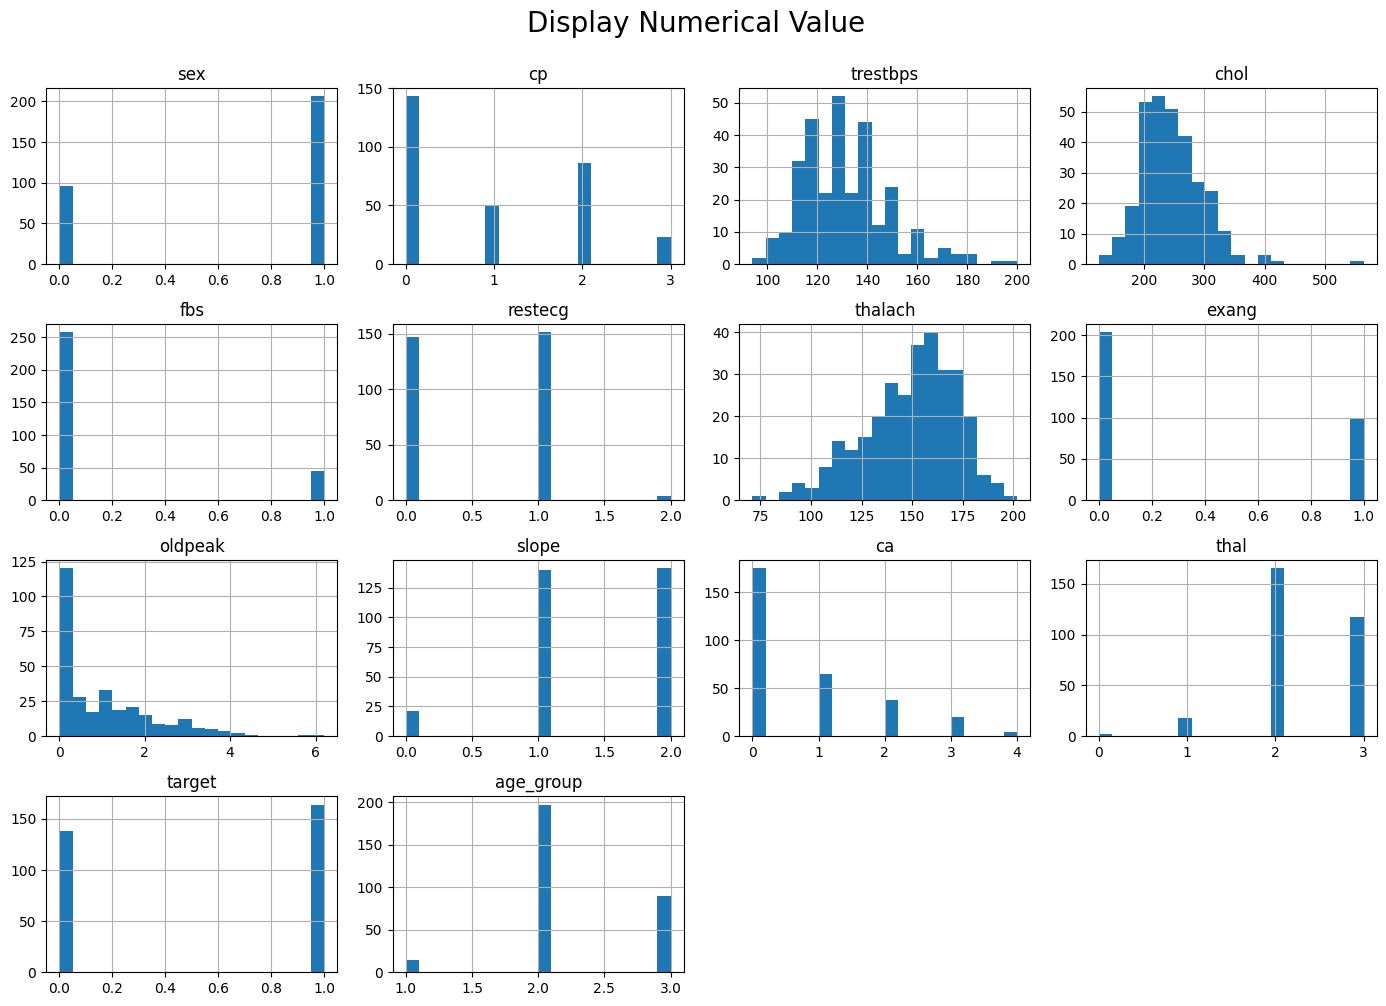

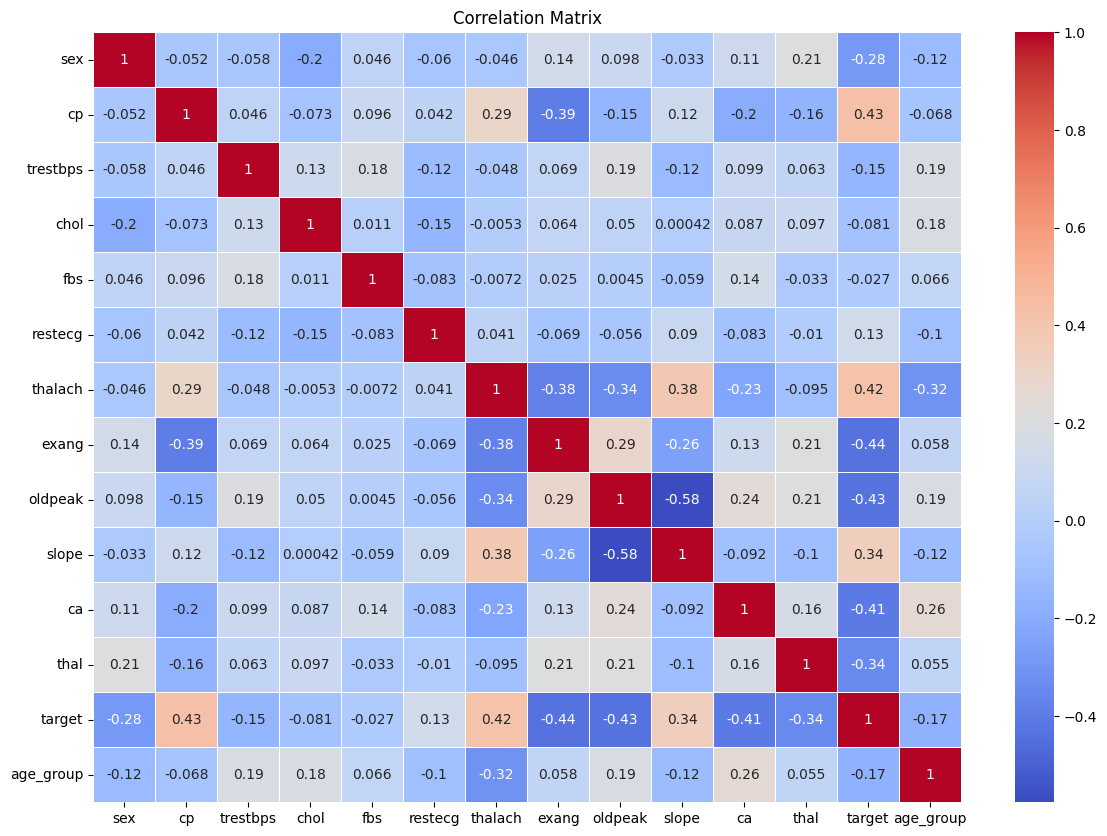

In [9]:
#Visualize the distribution of numerical features in the dataset.
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Display Numerical Value', fontsize=20, y=1)
plt.tight_layout(pad=1.0)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Target Selection & Data Splitting
We will define our features (`X`) and target (`y`). The target variable is the Target which gives 1 for heart disease and 0 for not, and we will split the data into training, validation, and test sets. The training set will be used to train the models, the validation set will be used for model evaluation, and the test set will be used for the final evaluation.
sizes defined as we did in class: train 70%, val 15% and test 15%.


In [10]:
# Features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (211, 13)
Validation set shape: (45, 13)
Test set shape: (46, 13)


## Model Selection

three models were evaluated: K-Nearest Neighbors (KNN), Random Forest, and Decision Tree.
The models were trained and evaluated on the validation set using accuracy, precision, recall, and F1 score.

This code integrates k-fold cross-validation into the model evaluation process because we remain with not a lot of data after we remove the duplicates


In [11]:
# Model Selection (KNN, Random Forest, Decision Tree)
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Define a function to compute evaluation metrics
def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    return accuracy, precision, recall, f1

# Initialize a dictionary to store the results
evaluation_results = {}
train_vs_val_accuracy = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    val_accuracy, precision, recall, f1 = evaluate_model(model, X_val, y_val)
    evaluation_results[name] = {
        'Accuracy': val_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    train_vs_val_accuracy[name] = {
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy
    }


## Fine-Tuning and Optimization
We will perform hyperparameter optimization for the Random Forest model (the best model from the comparison) using GridSearchCV to find the best combination of hyperparameters.

(it can take a few minutes)

In [12]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [6, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 8]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Random Forest: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Use the best parameters for the Random Forest model
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Evaluate the best Random Forest model
best_rf.fit(X_train, y_train)
train_accuracy = best_rf.score(X_train, y_train)
val_accuracy, precision, recall, f1 = evaluate_model(best_rf, X_val, y_val)
evaluation_results['Best Random Forest'] = {
    'Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
train_vs_val_accuracy['Best Random Forest'] = {
    'Training Accuracy': train_accuracy,
    'Validation Accuracy': val_accuracy
}


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50}
Best cross-validation score: 0.8344


## Model Evaluation

Compare the evaluation metrics of all models and plot the results.


                    Accuracy  Precision    Recall  F1 Score
KNN                 0.577778   0.580645  0.750000  0.654545
Random Forest       0.822222   0.785714  0.916667  0.846154
Decision Tree       0.688889   0.727273  0.666667  0.695652
Best Random Forest  0.866667   0.846154  0.916667  0.880000


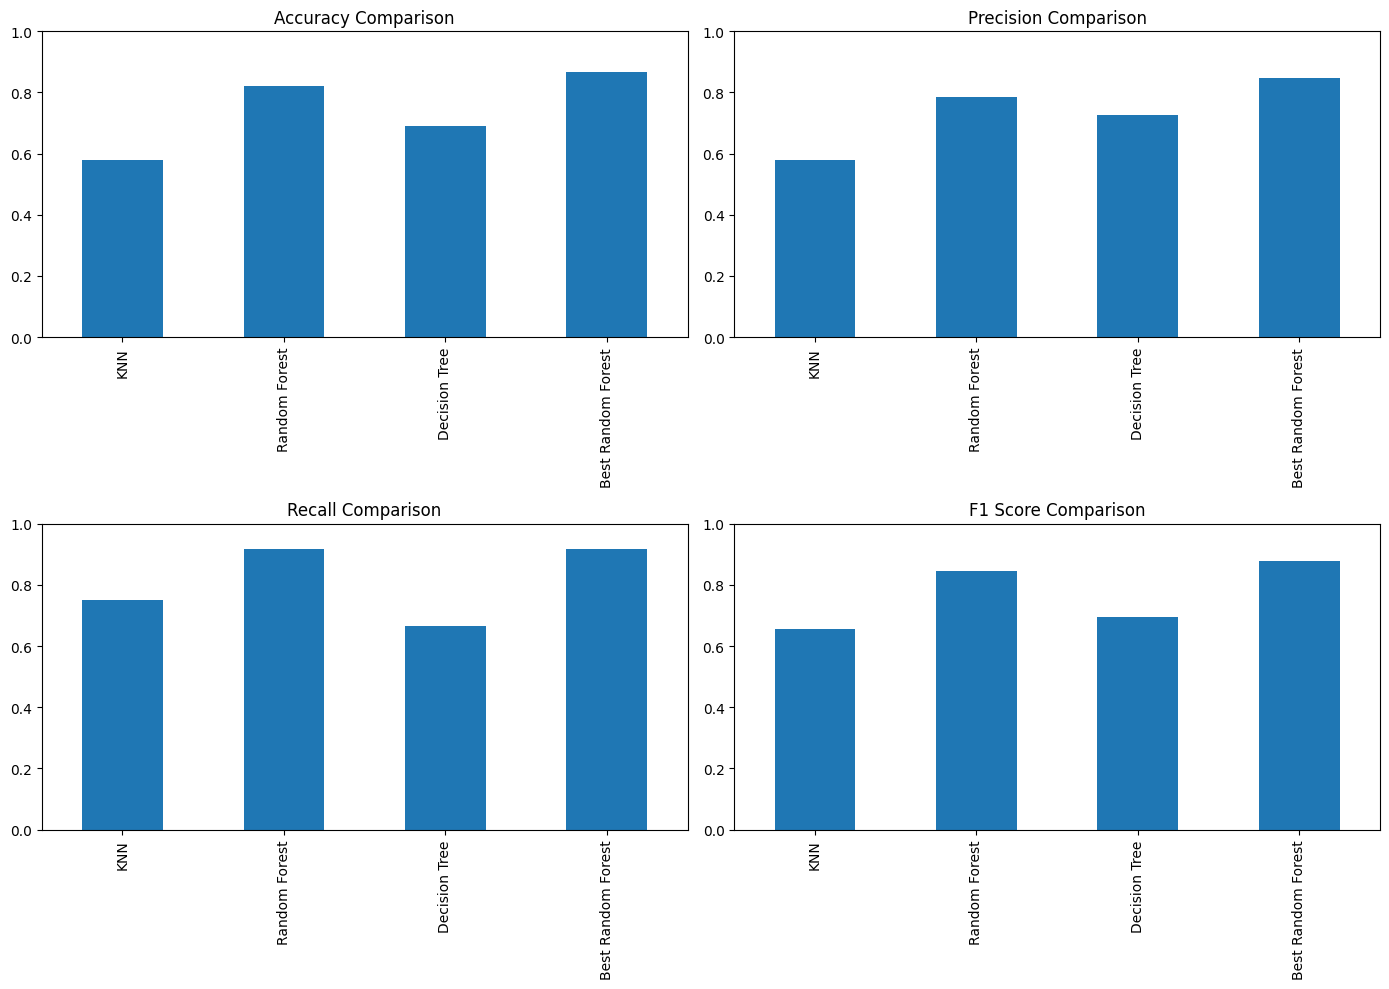

In [13]:
# Convert results to a DataFrame for easier comparison
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# Plot the results for better visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

evaluation_df[['Accuracy']].plot(kind='bar', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylim(0, 1)

evaluation_df[['Precision']].plot(kind='bar', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylim(0, 1)

evaluation_df[['Recall']].plot(kind='bar', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylim(0, 1)

evaluation_df[['F1 Score']].plot(kind='bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()



##Checking for potential overfitting
If the training accuracy is significantly higher than the validation accuracy, it indicates overfitting

                    Training Accuracy  Validation Accuracy
KNN                          0.744076             0.577778
Random Forest                1.000000             0.822222
Decision Tree                1.000000             0.688889
Best Random Forest           1.000000             0.866667


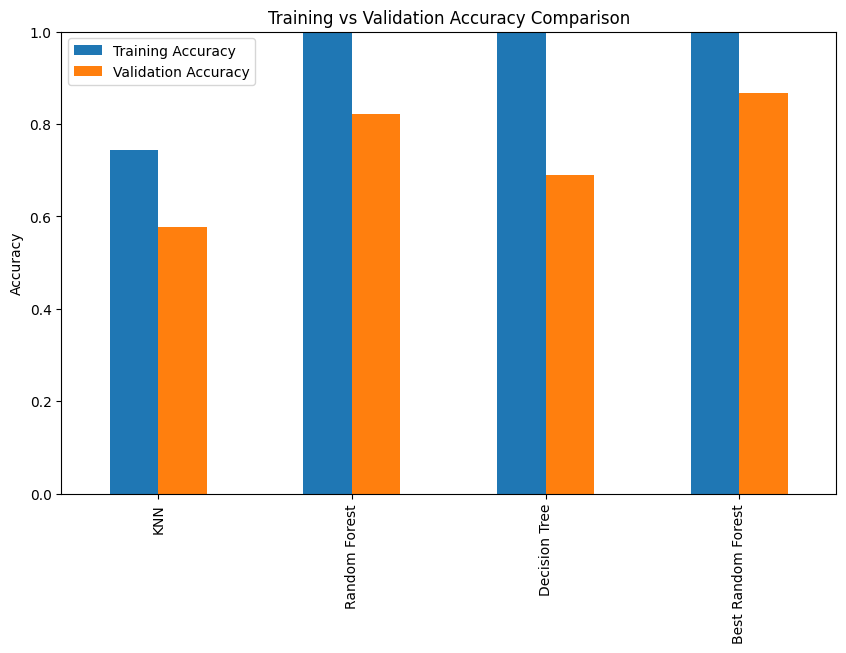

In [14]:
train_vs_val_df = pd.DataFrame(train_vs_val_accuracy).T
print(train_vs_val_df)

# Plot training vs validation accuracy
train_vs_val_df.plot(kind='bar', figsize=(10, 6))
plt.title('Training vs Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


## Final Evaluation on the Test Set

Evaluate the best Random Forest model on the test set and plot the confusion matrix.


Test Accuracy: 0.8043
Test Precision: 0.7083
Test Recall: 0.8947
Test F1 Score: 0.7907
Test Confusion Matrix:
[[20  7]
 [ 2 17]]


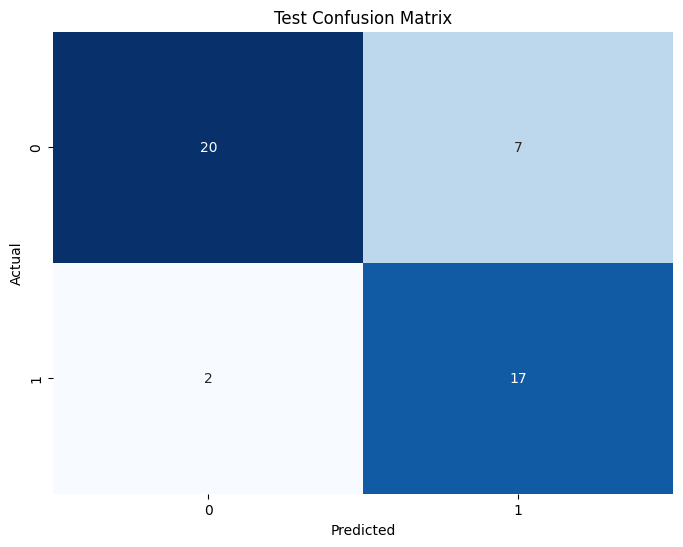

In [15]:
# Final evaluation on the test set for the best Random Forest model
y_test_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Plotting the confusion matrix for better visualization
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_conf_matrix, title='Test Confusion Matrix')


## Conclusion
This analysis shows that the Random Forest model, after hyperparameter tuning, performed the best in predicting heart disease, with high accuracy, precision, recall, and F1 score on the test set. The final model can be used for reliable predictions of heart disease in similar datasets.